# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [142]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error as mse, r2_score as r2

from IPython.display import Image

In [143]:
from sklearn.manifold import TSNE

In [144]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

In [145]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :0]])
target = raw_df.values[1::2, 2]

In [146]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [147]:
data.shape

(506, 11)

In [148]:
raw_df.to_csv('boston.csv', index=False)

In [149]:
boston = pd.read_csv('boston.csv', sep=',')
boston.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [150]:
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [151]:
feature_names = np.array(boston.keys(), dtype='<U7')
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO'], dtype='<U7')

In [152]:
data = np.hstack([boston.values[::2, :], boston.values[1::2, :0]])
target = boston.values[1::2, 2]

In [153]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
dtypes: float64(11)
memory usage: 43.6 KB


In [155]:
y = pd.DataFrame(target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [156]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 11), (102, 11), (404, 1), (102, 1))

In [159]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [160]:
X_test_scaled = scaler.fit_transform(X_test)

In [161]:
y_train_scaled = scaler.fit_transform(y_train)

In [162]:
y_test_scaled = scaler.fit_transform(y_test)

In [163]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [164]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [165]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [166]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 2.03312445e+00,  4.00675049e+01],
       [-2.59777397e-01, -8.63350677e+00],
       [ 1.11565037e+01, -1.91140614e+01],
       [-4.70894635e-01,  3.40492935e+01],
       [-1.12443943e+01, -7.38618565e+00],
       [ 3.69085574e+00, -1.20915585e+01],
       [ 2.94891572e+00, -1.02748737e+01],
       [ 1.77986012e+01, -2.22723827e+01],
       [ 4.58651400e+00,  3.71865997e+01],
       [ 3.39935571e-01,  3.07940788e+01],
       [ 3.60853791e+00, -1.03033848e+01],
       [-4.33774233e+00, -1.39715004e+01],
       [-7.82993746e+00, -1.63197079e+01],
       [ 4.43566704e+00,  3.65980339e+01],
       [-7.38017654e+00, -1.80986137e+01],
       [-1.25774088e+01, -7.75435209e+00],
       [-3.60615468e+00, -6.47428465e+00],
       [ 1.09732637e+01, -2.04442978e+01],
       [ 9.92094421e+00, -1.25426931e+01],
       [ 1.11773367e+01, -1.64107399e+01],
       [ 7.47078657e+00,  4.24302864e+01],
       [-6.43584442e+00, -6.66518927e+00],
       [ 4.57800579e+00, -1.43922443e+01],
       [ 6.

In [167]:
X_train_tsne.shape

(404, 2)

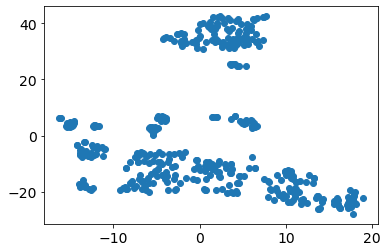

In [168]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [169]:
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [170]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [171]:
pd.value_counts(labels_train)

2    185
0    115
1    104
dtype: int64

In [172]:
labels_test = kmeans.predict(X_test_scaled)

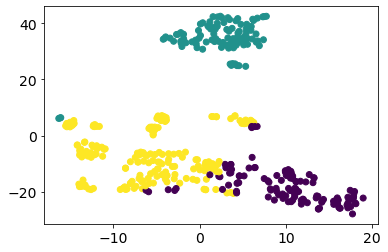

In [173]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=labels_train)

In [174]:
y_train.mean()

price    22.796535
dtype: float64

In [175]:
y_train[labels_train==0].mean()

price    27.113913
dtype: float64

In [176]:
y_train[labels_train==1].mean()

price    16.225
dtype: float64

In [177]:
y_train[labels_train==2].mean()

price    23.807027
dtype: float64

In [178]:
X_train.loc[labels_train==0,'CRIM'].mean()

0.08425226086956525

In [179]:
X_train.loc[labels_train==1,'CRIM'].mean()

12.804150384615385

In [181]:
X_train.loc[labels_train==2,'CRIM'].mean()

0.6311659459459459